# Rooftop Solar Potential Optimization for Sustainable Energy in Nairobi

## Business Understanding

The project addresses a real-world problem faced by Nairobi residents and businesses due to frequent unprojected power outages from the Kenya Power Lighting Company (KPLC). This problem creates a demand for alternative energy sources, with solar power being a viable option. However, there is a lack of a systematic approach to harness the solar potential of individual buildings in Nairobi.


## Problem Statement

There is a lack of a systematic approach for harnessing the solar potential of individual buildings in Nairobi. This is exacerbated by multiple unprojected power outages from KPLC, leading to increased interest in alternative energy sources. The primary issues include an absence of precise insights into suitable areas for solar installations and the lack of leveraging a vector dataset containing building footprints in Nairobi.

## Objectives

1. **Rooftop Solar Potential Prediction:**
  - Utilize machine learning techniques to predict suitable rooftop areas, installable capacity, and estimated yearly energy potential for each building unit.
  - Incorporate features such as building type, estimated tilt, and building height in the predictive models.


2. **Optimization Strategies:**
   - Implement algorithms to identify the most efficient rooftop solar installations.
   - Develop strategies for maximizing solar potential while respecting building characteristics.
   - Conduct a basic cost-benefit analysis considering unit installation prices to determine the economic viability of rooftop solar installations for different building types.

3. **User-Friendly Interface:**
   - Develop a user-friendly interface for stakeholders to interact with the system.
   - Enable users to input building characteristics and receive real-time recommendations for optimal rooftop solar installations.

### Stakeholders

- **Property Owners and Managers:**
  - Seek insights into the solar potential of their buildings.
  - Need guidance on optimizing rooftop solar installations for sustainable energy planning and cost-effective solar projects.

- **Solar Installation Companies:**
  - Interested in identifying and prioritizing buildings with high solar potential for targeted marketing.
  - Utilizing the system to streamline sales efforts and optimize project planning.

- **Energy Regulatory Authorities:**
  - Aim to promote sustainable energy practices in the city.
  - Can leverage insights for policy formulation and incentive programs to encourage rooftop solar adoption.


## Limitations of the Study

- **Geographical Specificity:**
  - The system's effectiveness may be limited to Nairobi and may not be directly applicable to other regions with different geographic characteristics.
  
- **Data Dependency:**
  - The accuracy of predictions relies on the availability and accuracy of building footprint data and other relevant datasets.

- **Regulatory Variability:**
  - Different regions may have varying regulations affecting solar installations, which may not be fully considered in the system.

- **Assumed Data Quality:**
  - Assumptions about the quality of input data, including building characteristics and geographical information, may impact the accuracy of predictions.

## Success Metrics

- **Prediction Accuracy:**
  - Root Mean Squared Error (RMSE) and the Mean Squared Error (MSE) should be as low as possible

- **User Engagement:**
  - Evaluate user interaction with the system's interface, ensuring it meets the needs of stakeholders.

- **Cost-Benefit Analysis Insights:**
  - Assess the effectiveness of the system in providing valuable insights for economic decision-making in rooftop solar installations.




In [2]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Understanding

In [3]:
#load and read the data

data  = pd.read_csv("data/nairobi_rooftop_solar_potential.csv")
data

/Users/esthernyawera/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,87100c54-0648-4e73-97f0-3a346c068231,Nairobi,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00,NaN,NaN
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,Nairobi,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98,NaN,NaN
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,Nairobi,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72,NaN,NaN
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,Nairobi,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60,NaN,NaN
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,Nairobi,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272746,05f945d2-946f-4079-9108-2b0e23328bbe,Nairobi,36.78,0.00,0.00,0.00,single family residential,11.97,2.55,NaN,NaN,NaN
272747,b66554f5-173c-46d0-80c0-19b5e3ef04ab,Nairobi,181.87,109.44,21.23,31274.44,single family residential,18.37,3.04,1473.00,NaN,NaN
272748,abb75046-2851-4c62-a123-7d052a098c7b,Nairobi,164.34,94.38,18.31,27153.65,single family residential,9.59,4.59,1483.00,NaN,NaN
272749,d5238d1b-b7f1-47ed-bda8-7d815cee01d4,Nairobi,173.43,99.64,19.33,27911.63,single family residential,16.14,4.92,1444.00,NaN,NaN


## Data Description

The provided dataset contains information about building structures and their suitability for solar panel installation. Below is a detailed description of each column in the dataset, including unit information:


1. **uuid:**
   - *Type:* Unique identifier
   - *Description:* Unique ID assigned to each building structure polygon in the dataset.

2. **city:**
   - *Type:* Categorical
   - *Description:* Indicates the study area or city where the building is located.

3. **Surface_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Represents the surface area of the building, providing spatial information for solar potential assessment.

4. **Potential_installable_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Indicates the potential rooftop area suitable for solar panel installation, contributing to the overall solar capacity.

5. **Peak_installable_capacity:**
   - *Type:* Numeric (in kilowatt peak - kWp)
   - *Description:* Represents the estimated peak installable capacity based on the suitable rooftop area. This is a crucial factor in determining the potential power generation.

6. **Energy_potential_per_year:**
    - *Type:* Numeric (in kilowatt-hours - kWh)
   - *Description:* Provides an estimate of the yearly energy potential of the rooftop

7. **Assumed_building_type:**
   - *Type:* Categorical
   - *Description:* Describes the use type of the building (e.g., single family residential, commercial ).

8. **Estimated_tilt:**
   - *Type:* Numeric
   - *Description:* Represents the estimated tilt of the rooftop, a significant factor influencing the efficiency of solar panels in capturing sunlight.

9. **Estimated_building_height:**
   - *Type:* Numeric
   - *Description:* Provides an estimate of the building height, offering additional information about the structure that may impact solar potential.

10. **Estimated_capacity_factor:**
   - *Type:* Numeric
   - *Description:* The estimated capacity factor is a measure of the efficiency of a solar installation, considering various factors such as available space, structural integrity, shading, and local regulations. It represents the ratio of the actual electrical output over a specific period to the maximum possible output if the system operated at full capacity. A higher capacity factor indicates a more efficient and reliable solar installation.


### Unit Information

- *suitable_area:* Square meters (m2)
- *installable_capacity:* Kilowatt peak (kWp)
- *potential:* Kilowatt-hours (kWh)

**Note:**
- The dataset is based on GeoEye 1 imagery acquired in 2020.
- This information allows for the analysis of rooftop solar potential, installable capacity, and estimated yearly power potential for each building in the study area.


## Data Cleaning


In [4]:
#removing the irrelevant columns 
data.drop(columns=["Comment", "Unit_installation_price","City"],inplace=True)

data.head()

,uuid,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,87100c54-0648-4e73-97f0-3a346c068231,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00


In [5]:
def display_data_understanding(dataframe):
    """
    Displays basic information about the provided DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to analyze.
    """
    # Basic information about the DataFrame
    print("Basic Information:")
    print(dataframe.info())

    # Descriptive statistics for numeric columns
    print("\nDescriptive Statistics for Numeric Columns:")
    print(dataframe.describe())

    # Shape of the DataFrame
    print("\nShape of the DataFrame:")
    print(dataframe.shape)

    # Missing values in each column
    print("\nMissing Values:")
    print(dataframe.isnull().sum())


# Call the function with your dataset
display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272751 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272751 non-null  object 
 1   Surface_area                272751 non-null  float64
 2   Potential_installable_area  272751 non-null  float64
 3   Peak_installable_capacity   272751 non-null  float64
 4   Energy_potential_per_year   272751 non-null  float64
 5   Assumed_building_type       272751 non-null  object 
 6   Estimated_tilt              272751 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   269249 non-null  float64
dtypes: float64(7), object(2)
memory usage: 18.7+ MB
None

Descriptive Statistics for Numeric Columns:
        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272751.000000               272751.000000   

### Missing Values:
- The columns 'Estimated_building_height' and 'Estimated_capacity_factor' have missing values.
  
#### Estimated_building_height:
- There are 30 missing values in the 'Estimated_building_height' column. These missing values need to be addressed, as this information is crucial for assessing the physical characteristics of buildings.

#### Estimated_capacity_factor:
- The 'Estimated_capacity_factor' column has 3,502 missing values. These missing entries may impact the accuracy of the capacity factor calculations, and imputation or other strategies may be considered to handle these missing values.

Inorder to decide whether to impute the values in the `Estimated_capacity_factor` we check the distribution of this data using a histogram inorder to decide whether to use the mean or median

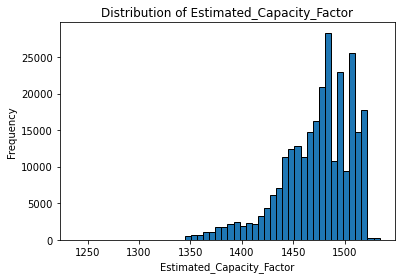

In [6]:


# Visualize the distribution using a histogram
plt.hist(data["Estimated_capacity_factor"].dropna(),
         bins=50, edgecolor='black')
plt.title('Distribution of Estimated_Capacity_Factor')
plt.xlabel('Estimated_Capacity_Factor')
plt.ylabel('Frequency')
plt.show()


Given the distribution of the `Estimated_Capacity_Factor` column, it appears to be right-skewed. In such cases, using the **median** for imputation is generally more appropriate. This is because the median is less sensitive to outliers and skewed data, providing a more robust measure of central tendency. Therefore, in this case, median imputation would be a better method.

In [7]:
# Drop rows with missing values in Estimated_Building_Height
data.dropna(subset=['Estimated_building_height'], inplace=True)

# Impute missing values in Estimated_Capacity_Factor


data["Estimated_capacity_factor"].fillna(
    data["Estimated_capacity_factor"].median(), inplace=True)


display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 272721 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272721 non-null  object 
 1   Surface_area                272721 non-null  float64
 2   Potential_installable_area  272721 non-null  float64
 3   Peak_installable_capacity   272721 non-null  float64
 4   Energy_potential_per_year   272721 non-null  float64
 5   Assumed_building_type       272721 non-null  object 
 6   Estimated_tilt              272721 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   272721 non-null  float64
dtypes: float64(7), object(2)
memory usage: 20.8+ MB
None

Descriptive Statistics for Numeric Columns:
        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272721.000000               272721.000000   

The missing/null values have already been handled as seen in the output provided above now we check for duplicates.

In [8]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


####  Check for Outliers

After examining the dataset for potential duplicates, the next step is to explore the presence of outliers in the data. Outliers can significantly impact the accuracy of statistical analyses and machine learning models. To identify potential outliers, a boxplot analysis will be conducted.

##### Boxplot Analysis:

A boxplot provides a visual representation of the distribution of data and helps identify any extreme values, also known as outliers. Each boxplot displays the interquartile range (IQR), with outliers plotted as individual points beyond the whiskers.

The following steps will be taken to check for outliers:

1. **Boxplot Visualization:**
   - A boxplot will be generated for each numeric column in the dataset to visualize the spread of values and identify any data points that fall outside the expected range.

2. **Outlier Identification:**
   - Outliers will be identified based on their position outside the whiskers of the boxplot. These data points may require further investigation and consideration in subsequent analyses.

This process aims to ensure the robustness of the data by addressing potential outliers, contributing to a more reliable and accurate interpretation of the dataset.



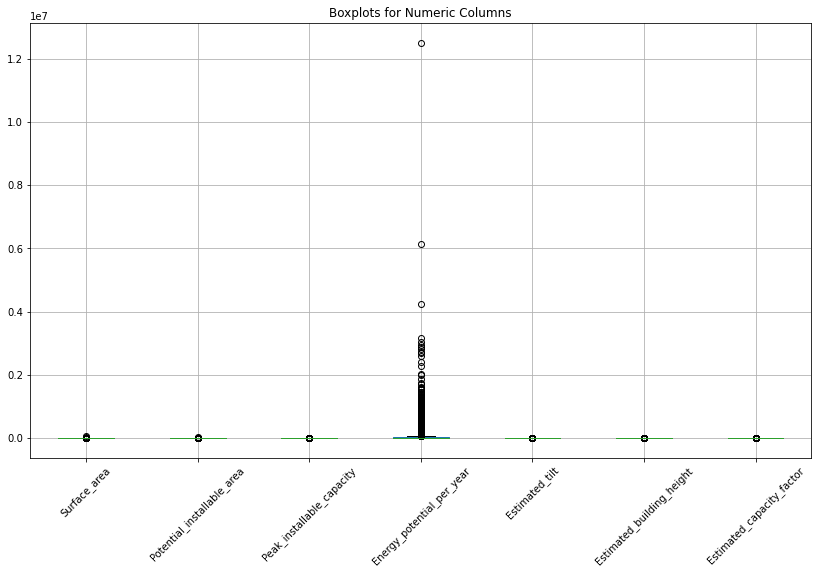

In [9]:
# Select numeric columns for boxplots
numeric_columns = data[['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                        'Energy_potential_per_year', 'Estimated_tilt', 'Estimated_building_height',
                        'Estimated_capacity_factor']]


# Create boxplots using matplotlib
plt.figure(figsize=(14, 8))
numeric_columns.boxplot(rot=45)
plt.title('Boxplots for Numeric Columns')
plt.show()

It seems that there are outliers in the `Energy_potential_per_year` column.Given the domain-specific rules for energy consumption in buildings, it's essential to understand the context and potential factors that could lead to outliers in the `Energy_potential_per_year` column. Here are a few potential reasons:

1. **Building Type Variation:**
   - Different building types may have significantly different energy needs. For example, industrial facilities typically consume more energy compared to residential or commercial buildings. If the dataset includes various building types, this could contribute to variations in energy potential.

2. **Specialized Functions:**
   - Buildings with specialized functions or equipment may exhibit higher energy potential. For instance, buildings hosting data centers, manufacturing units, or heavy machinery might require more energy for their operations.

3. **Geographical Variances:**
   - Geographic location can impact energy potential. Buildings in regions with extreme weather conditions might have higher energy needs for heating or cooling. Additionally, renewable energy potential, such as solar energy, can vary based on location.


# EDA

In [10]:
data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [11]:
#sns.pairplot(numeric_columns)
#plt.show()

In [12]:
data.Assumed_building_type.value_counts(normalize=True)

single family residential    0.667723
multi-family residential     0.138512
commercial                   0.058657
public                       0.053359
industrial                   0.046109
peri-urban settlement        0.035641
Name: Assumed_building_type, dtype: float64

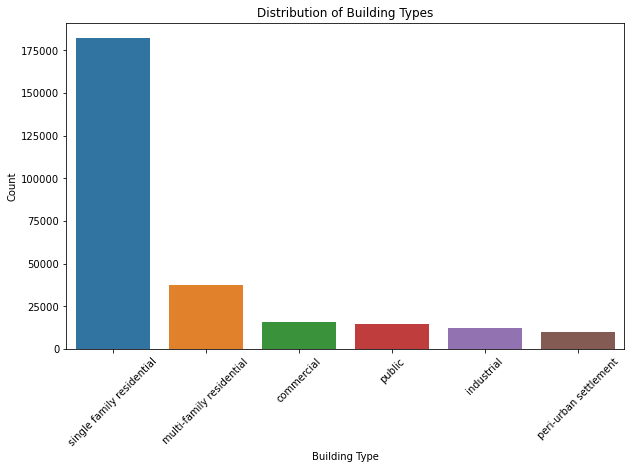

In [13]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Assumed_building_type'],
              order=data['Assumed_building_type'].value_counts().index)

# Add title and labels
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The distribution of building types in the dataset is presented below:

- **Single Family Residential:** 66.77%
- **Multi-Family Residential:** 13.85%
- **Commercial:** 5.87%
- **Public:** 5.34%
- **Industrial:** 4.61%
- **Peri-Urban Settlement:** 3.56%

### Interpretation:

- **Single Family Residential:** The majority of the buildings in the dataset, constituting approximately 66.77%, are categorized as single-family residential units. This suggests a predominant representation of individual homes.

- **Multi-Family Residential:** Around 13.85% of the buildings fall under the multi-family residential category, indicating a presence of structures designed to accommodate multiple households.

- **Commercial:** Approximately 5.87% of the buildings are classified as commercial, suggesting a presence of business or retail establishments.

- **Public:** Representing 5.34%, public buildings such as government facilities, schools, or community centers are a notable category in the dataset.

- **Industrial:** With a share of 4.61%, industrial buildings are present, likely indicating manufacturing or production facilities.

- **Peri-Urban Settlement:** The category of peri-urban settlements comprises about 3.56% of the dataset. This suggests a representation of buildings located on the outskirts of urban areas.

Understanding the distribution of building types is crucial for contextualizing the dataset and gaining insights into the predominant property characteristics and potential solar energy adoption patterns.


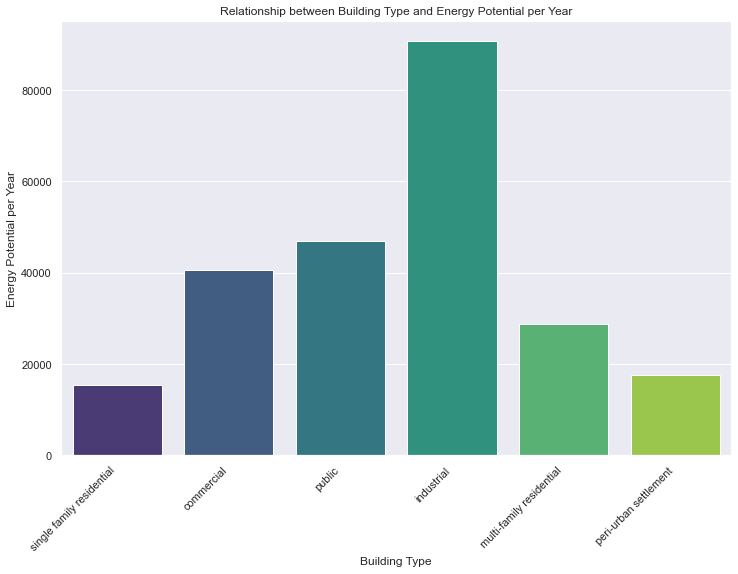

In [14]:

# Barplot showing the relationship between building type and energy potential per year

sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='Assumed_building_type', y='Energy_potential_per_year',
            data=data, ci=None, palette='viridis', capsize=0.2, errwidth=2, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Building Type and Energy Potential per Year')
plt.xlabel('Building Type')
plt.ylabel('Energy Potential per Year')
plt.show()

The provided bar graph visually represents the energy potential per year across various building types. Let's interpret the key insights derived from the plot:

#### Interpretation of the Bar Plot:

- **Industrial:** Industrial buildings exhibit the highest energy potential, reaching close to 80,000 units per year.

- **Public:** Public buildings, such as libraries or museums, have the second-highest energy potential.

- **Commercial:** Commercial buildings used for business purposes rank third in terms of energy potential.

- **Multi-family Residential:** Buildings accommodating multiple families (e.g., apartments) show a lower energy potential compared to commercial structures.

- **Single Family Residential:** Standalone houses designed for one family demonstrate a lower energy potential than multi-family residential buildings.

- **Peri-urban settlement:** Buildings within specific areas dedicated to particular purposes or groups display the lowest energy potential.


In [15]:
#Encoding the Assumed Building Type
# One-hot encoding can be done using pandas get_dummies function
df = data.copy()
# df = pd.get_dummies(data, columns=['Assumed_building_type'],dtype=int)
freq_encoding = data['Assumed_building_type'].value_counts(normalize=True)

df['Assumed_building_type_freq_encoded'] = df['Assumed_building_type'].map(
    freq_encoding)



df = df.drop(columns = ["uuid","Assumed_building_type"])

In [16]:
df

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Assumed_building_type_freq_encoded
0,204.53,77.27,14.99,21720.76,14.11,9.09,1449.00,0.667723
1,1113.35,676.13,131.17,182191.10,21.81,5.57,1388.98,0.667723
2,577.24,412.30,79.99,115637.95,16.34,5.78,1445.72,0.667723
3,28.58,14.17,2.75,3723.02,23.71,4.04,1354.60,0.667723
4,19.03,6.19,1.20,1655.39,22.91,5.31,1378.00,0.667723
...,...,...,...,...,...,...,...,...
272746,36.78,0.00,0.00,0.00,11.97,2.55,1479.00,0.667723
272747,181.87,109.44,21.23,31274.44,18.37,3.04,1473.00,0.667723
272748,164.34,94.38,18.31,27153.65,9.59,4.59,1483.00,0.667723
272749,173.43,99.64,19.33,27911.63,16.14,4.92,1444.00,0.667723


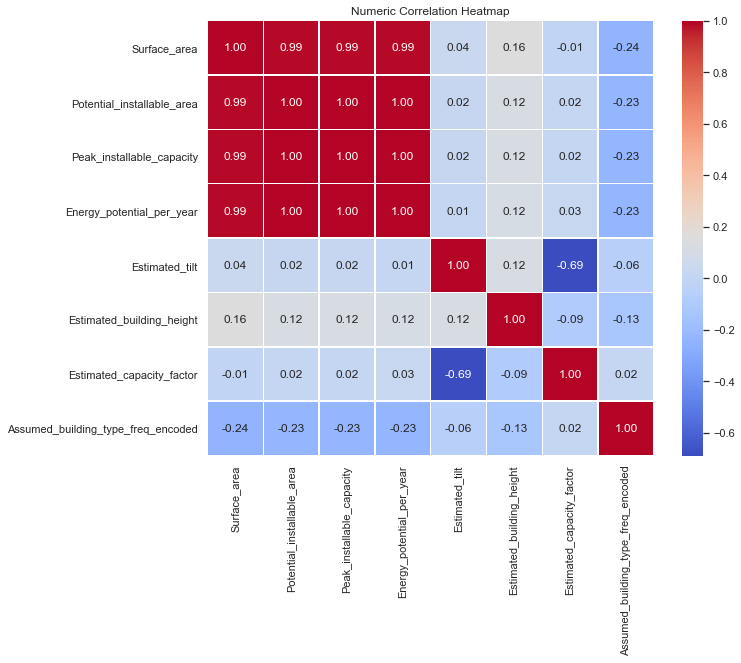

In [17]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

The correlation matrix provides insights into the relationships between the selected numeric columns. Here's a summarized overview:

**Strong Positive Correlations:**
- Surface Area with Potential Installable Area (0.988), Peak Installable Capacity (0.988), Energy Potential per Year (0.987)
- Potential Installable Area with Surface Area (0.988), Peak Installable Capacity (1.000), Energy Potential per Year (0.999)
- Peak Installable Capacity with Surface Area (0.988), Potential Installable Area (1.000), Energy Potential per Year (0.999)
- Energy Potential per Year with Surface Area (0.987), Potential Installable Area (0.999), Peak Installable Capacity (0.999)

**Weak Positive Correlations:**
- Estimated Tilt with all other columns (ranging from 0.013 to 0.121)
- Estimated Building Height with Surface Area (0.159), Potential Installable Area (0.118), Peak Installable Capacity (0.118), Energy Potential per Year (0.116)
- Estimated Capacity Factor with Energy Potential per Year (0.026)

**Notable Negative Correlations:**
- Estimated Tilt with Estimated Capacity Factor (-0.688)
- Estimated Capacity Factor with Estimated Tilt (-0.688)

It's important to interpret these correlations cautiously, considering that correlation does not imply causation. Further analysis may be required to understand the underlying dynamics between these variables.


In [18]:
correlation_matrix

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Assumed_building_type_freq_encoded
Surface_area,1.000000,0.988387,0.988385,0.987066,0.041710,0.159512,-0.005425,-0.244803
Potential_installable_area,0.988387,1.000000,1.000000,0.999753,0.018915,0.118100,0.016930,-0.230521
Peak_installable_capacity,0.988385,1.000000,1.000000,0.999753,0.018914,0.118097,0.016930,-0.230515
Energy_potential_per_year,0.987066,0.999753,0.999753,1.000000,0.013575,0.115896,0.026130,-0.229071
Estimated_tilt,0.041710,0.018915,0.018914,0.013575,1.000000,0.121678,-0.688283,-0.058252
Estimated_building_height,0.159512,0.118100,0.118097,0.115896,0.121678,1.000000,-0.089620,-0.129026
Estimated_capacity_factor,-0.005425,0.016930,0.016930,0.026130,-0.688283,-0.089620,1.000000,0.017062
Assumed_building_type_freq_encoded,-0.244803,-0.230521,-0.230515,-0.229071,-0.058252,-0.129026,0.017062,1.000000


In [19]:

def calculate_vif(data_frame):
    """
    Calculate VIF for each predictor variable in a DataFrame.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing predictor variables.

    Returns:
    - pd.DataFrame: A DataFrame showing the VIF for each variable.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(
        data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data


# Assuming 'numeric_columns' is your DataFrame with numeric predictors
vif_result = calculate_vif(df)
print(vif_result)

                             Variable           VIF
0                        Surface_area  6.855948e+01
1          Potential_installable_area  4.787747e+06
2           Peak_installable_capacity  4.786911e+06
3           Energy_potential_per_year  2.812961e+03
4                      Estimated_tilt  5.237537e+00
5           Estimated_building_height  1.715005e+00
6           Estimated_capacity_factor  9.511422e+00
7  Assumed_building_type_freq_encoded  4.281507e+00


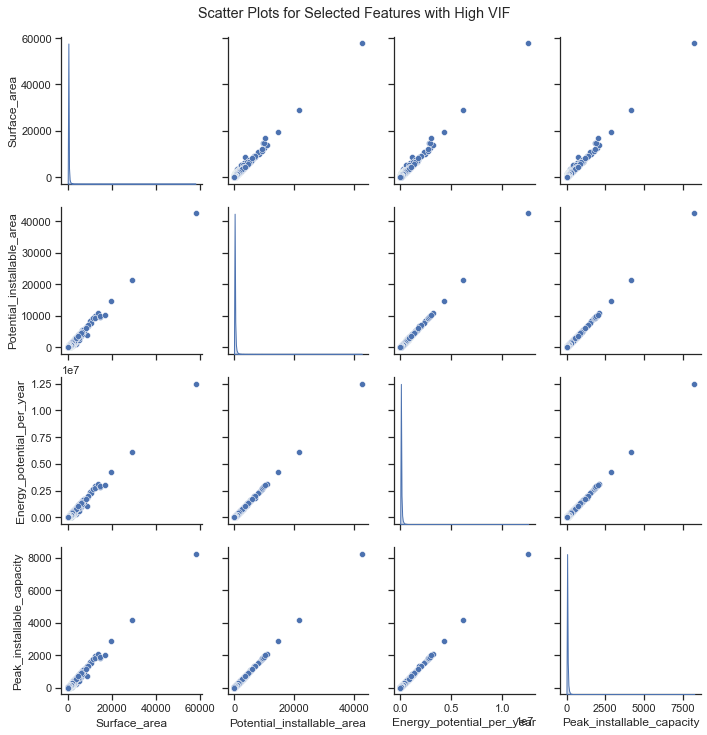

In [20]:
# Select a subset of features for scatter plots
scatter_features = df[[
    'Surface_area', 'Potential_installable_area', 'Energy_potential_per_year',"Peak_installable_capacity"]]

# Create scatter plots
sns.set(style="ticks")
sns.pairplot(scatter_features, kind="scatter", diag_kind="kde")
plt.suptitle('Scatter Plots for Selected Features with High VIF', y=1.02)
plt.show()

The pair plot reveals correlations among key variables, such as Surface Area, Potential Installable Area, Peak Installable Capacity, and Energy Potential per Year, especially focusing on instances with high Variance Inflation Factor (VIF). Analyzing these relationships helps identify strong positive correlations between certain pairs of variables. Understanding these correlations aids in recognizing multicollinearity issues, which is crucial for addressing high VIF values.

 By observing the patterns in the pair plot, one can gain insights into potential redundancies and dependencies among variables, facilitating informed decisions on which features to consider for removal in order to mitigate multicollinearity and improve model stability.

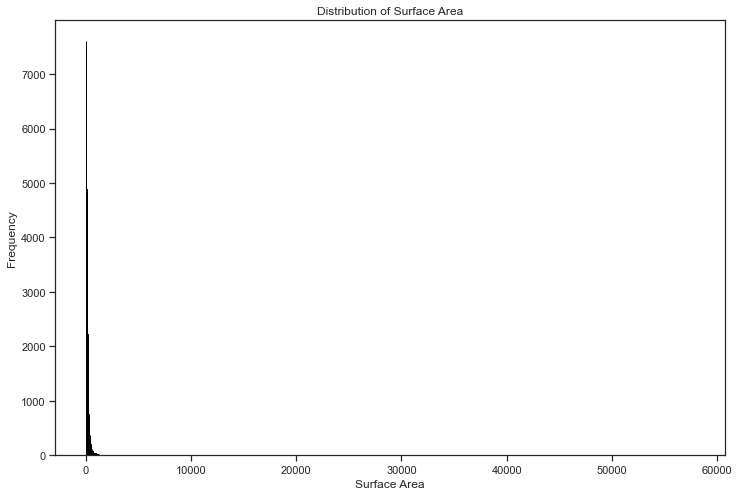

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(df['Surface_area'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Frequency')
plt.show()

In [22]:

calculate_vif(df)

,Variable,VIF
0,Surface_area,6.855948e+01
1,Potential_installable_area,4.787747e+06
2,Peak_installable_capacity,4.786911e+06
3,Energy_potential_per_year,2.812961e+03
4,Estimated_tilt,5.237537e+00
5,Estimated_building_height,1.715005e+00
6,Estimated_capacity_factor,9.511422e+00
7,Assumed_building_type_freq_encoded,4.281507e+00


In [23]:
df['Installable_Area_Ratio'] = df['Potential_installable_area'] / \
    df['Surface_area']
    
df = df.drop(columns="Potential_installable_area")
calculate_vif(df)

,Variable,VIF
0,Surface_area,71.423468
1,Peak_installable_capacity,3306.890060
2,Energy_potential_per_year,2946.075656
3,Estimated_tilt,5.251710
4,Estimated_building_height,1.722745
5,Estimated_capacity_factor,31.988138
6,Assumed_building_type_freq_encoded,4.351539
7,Installable_Area_Ratio,20.641861


In [24]:
# # Calculate the ratio of peak installable capacity to surface area
# df['Capacity_to_Area_Ratio'] = df['Peak_installable_capacity'] / df['Surface_area']

# Now you can drop the original 'Peak_installable_capacity' column if it's no longer needed
df = df.drop(['Surface_area'], axis=1)
calculate_vif(df)

,Variable,VIF
0,Peak_installable_capacity,2669.210902
1,Energy_potential_per_year,2650.017700
2,Estimated_tilt,5.237258
3,Estimated_building_height,1.627935
4,Estimated_capacity_factor,29.537701
5,Assumed_building_type_freq_encoded,4.308827
6,Installable_Area_Ratio,19.791383


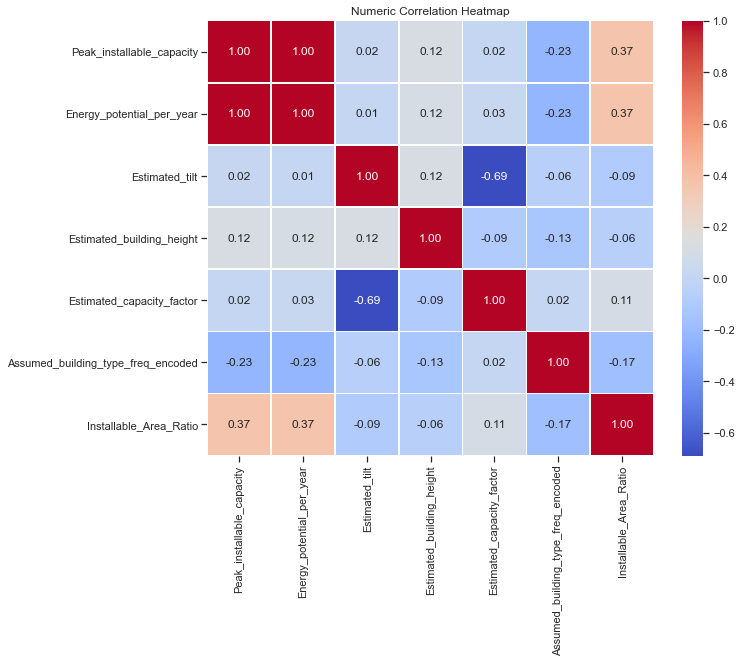

In [25]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

**Numeric Correlation Heatmap Interpretation**

1. **Energy Potential per Year:**
   - Strong positive correlation with Surface Area, Potential Installable Area, and Peak Installable Capacity.
   - Larger areas and higher capacities tend to have higher energy potential.

2. **Estimated Tilt:**
   - Negative correlation with Estimated Capacity Factor.
   - Higher tilt results in a lower capacity factor.

3. **Estimated Building Height:**
   - Weak positive correlation with Energy Potential per Year.
   - Weak negative correlation with Estimated Tilt.

4. **Assumed Building Type (encoded):**
   - Weak negative correlation with Energy Potential per Year.
   - Weak positive correlation with Estimated Tilt.

5. **Installable Area Ratio:**
   - Strong positive correlation with Energy Potential per Year.
   - Larger installable areas tend to result in higher energy potential.


### Creating a baseline model using Random Forest 


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Separate the predictors and the target variable
X = df.drop('Energy_potential_per_year', axis=1)
y = df['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 107145805.81271413
R-squared Score: 0.9675059391805114


Trying another model using Xgboost to try improve the R2

In [27]:
import xgboost as xgb

# Define the pipeline with preprocessing and modeling steps for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the XGBoost model using Mean Squared Error and R-squared score
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared Score: {r2_xgb}")


XGBoost Mean Squared Error: 67381508.30660288
XGBoost R-squared Score: 0.9795652399791479


In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'regressor__n_estimators': [50],
    'regressor__max_depth': [5],
    'regressor__learning_rate': [0.1]
}
# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_xgb_pipeline = grid_search.best_estimator_
final_xgb_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_final_xgb = final_xgb_pipeline.predict(X_test)

# Evaluate the final XGBoost model
mse_final_xgb = mean_squared_error(y_test, y_pred_final_xgb)
r2_final_xgb = r2_score(y_test, y_pred_final_xgb)

print("Best Hyperparameters:", best_params)
print(f"Final XGBoost Mean Squared Error: {mse_final_xgb}")
print(f"Final XGBoost R-squared Score: {r2_final_xgb}")


Best Hyperparameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 50}
Final XGBoost Mean Squared Error: 86036130.80068186
Final XGBoost R-squared Score: 0.9739078609218029


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute performance metrics on the training set
y_pred_train = final_xgb_pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Compute performance metrics on the testing set
mse_test = mean_squared_error(y_test, y_pred_final_xgb)
r2_test = r2_score(y_test, y_pred_final_xgb)

print("Training set performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared Score: {r2_train}")

print("\nTesting set performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared Score: {r2_test}")


Training set performance:
Mean Squared Error: 5033793.097577241
R-squared Score: 0.9982940174234235

Testing set performance:
Mean Squared Error: 86036130.80068186
R-squared Score: 0.9739078609218029


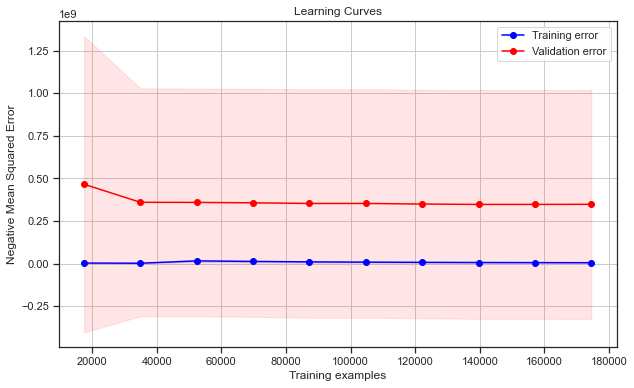

In [29]:
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, valid_scores_mean, label='Validation error', color='red', marker='o')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='red')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for the final XGBoost pipeline
plot_learning_curves(final_xgb_pipeline, X_train, y_train)


The image shows a learning curve graph with two lines: one for training error and one for validation error. Both errors are measured by the negative mean squared error.

The training error is relatively stable and low across the number of training examples.
The validation error decreases as the number of training examples increases, then it stabilizes.
This suggests the model is not overfitting, as both errors are converging to a similar value. More training data does not seem to be improving the model significantly after a certain point. The model appears to generalize well to new data.